# Movie Revenue Prediction

by Jason Jiang

The Movie Revenue Prediction project harnesses data science to create a predictive model for estimating a movie's box office earnings. By analysing features like budget, genre, release date, and marketing strategies, the project aims to provide valuable insights into the factors influencing a movie's success.

The Dataset was gathered from the following [Kaggle Link](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [31]:
# read csv file and display first 5 rows 
movie_tmdb_data = pd.read_csv("TMDB_movie_dataset_v11.csv")
movie_tmdb_data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili"
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian"


In [32]:
movie_tmdb_data.shape

(968952, 23)

The Dataset contains under 1 million movies (rows) and 23 columns.

|**Variable**|**Description**|
|----|----|
|id|Movie Unique Identifier|
|title|Movie Title|
|vote_average|Movie Vote Average|
|vote_count|Movie Vote Count|
|status|Movie Status of Release|
|release_date|Movie Release Date|
|revenue|Movie Revenue|
|runtime|Movie Run Duration (mins)|
|adult|Adult Movie Indicator|
|backdrop_path|Movie Backdrop Image Path|
|budget|Movie Budget|
|homepage|Movie Homepage|
|imdb_id|Movie IMDb Identifier|
|original_language|Movie Original Language|
|original_title|Movie Original Title|
|overview|Movie Overview|
|popularity|Movie Popularity|
|poster_path|Movie Poster Image Path|
|tagline|Movie Tagline|
|genres|Movie Genres|
|production_companies|Movie Production Companies|
|production_countries|Movie Production Countries|
|spoken_languages|Movie Spoken Languages|

Due to the large number of movies, we'll reduce the dataset to just the top 3000 movies. 

In [33]:
movie_tmdb_data = movie_tmdb_data.head(3000)

### Data Preprocessing

(Handle missing values, outliers, and ensure data consistency.
Convert categorical variables into numerical format through encoding.)

We'll now adjust the dataset to transform it into a suitable format for analysis and modeling.

In [34]:
movie_tmdb_data.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3000.000000
mean,1.490304e+05,6.861069,4517.517000,1.759453e+08,112.394333,4.997249e+07,35.552950
std,2.022151e+05,0.742117,4128.423106,2.454213e+08,21.303164,5.542728e+07,55.847001
min,5.000000e+00,2.890000,1388.000000,0.000000e+00,6.000000,0.000000e+00,0.600000
25%,5.169500e+03,6.343000,1921.000000,3.171138e+07,98.000000,1.000000e+07,19.186250
50%,2.642750e+04,6.855500,3004.000000,9.633576e+07,109.000000,3.000000e+07,25.858000
75%,2.843340e+05,7.400000,5414.250000,2.165145e+08,124.000000,7.000000e+07,37.325000
max,1.010581e+06,8.707000,34495.000000,2.923706e+09,242.000000,4.600000e+08,1567.273000


In [35]:
# Missing values across columns
movie_tmdb_data.isnull().sum()

id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
release_date               0
revenue                    0
runtime                    0
adult                      0
backdrop_path              0
budget                     0
homepage                1215
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
poster_path                0
tagline                  169
genres                     0
production_companies       0
production_countries       2
spoken_languages           2
dtype: int64

We'll look at the numerical features of revenue, budget, vote_average, vote_count, runtime, and popularity. Then remove outliers in these features

In [36]:
# Create new columns using the release date column
movie_tmdb_data['release_year'] = pd.to_datetime(movie_tmdb_data['release_date']).dt.year
movie_tmdb_data['release_month'] = pd.to_datetime(movie_tmdb_data['release_date']).dt.month
movie_tmdb_data['release_day'] = pd.to_datetime(movie_tmdb_data['release_date']).dt.day
movie_tmdb_data['release_dayofweek'] = pd.to_datetime(movie_tmdb_data['release_date']).dt.day_of_week

In [37]:
# Create new columns if movies has homepages or taglines
movie_tmdb_data['has_homepage'] = movie_tmdb_data['homepage'].isnull().astype(int)
movie_tmdb_data['has_tagline'] = movie_tmdb_data['tagline'].isnull().astype(int)

In [38]:
# Remove adult column since all are False
movie_tmdb_data = movie_tmdb_data.drop('adult', axis=1)

### Exploratory Data Analysis (EDA)

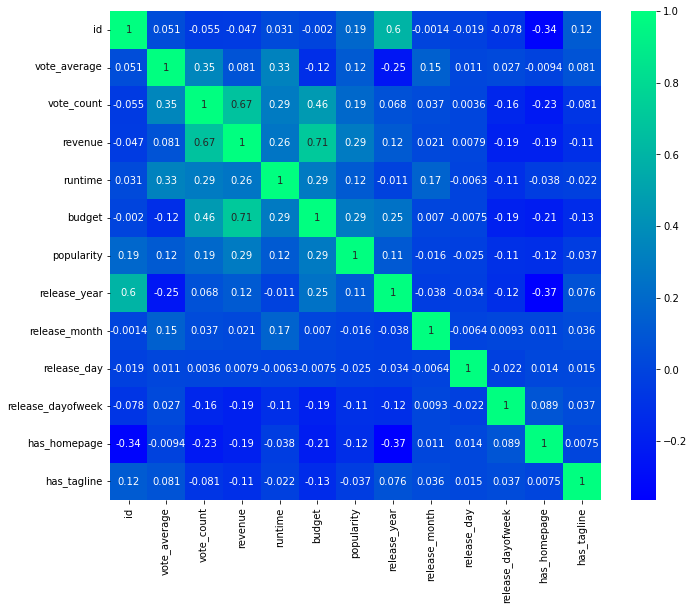

In [39]:
# Heatmap correlations between numerical features
plt.figure(figsize=(11,9))
sns.heatmap(movie_tmdb_data.corr(), cmap='winter', annot=True)
plt.show()

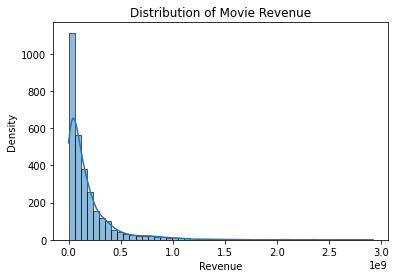

In [40]:
# Distribution of Movie Revenue
ax = sns.histplot(movie_tmdb_data.revenue, kde=True, bins=50)
ax.set(xlabel='Revenue', ylabel='Density', title='Distribution of Movie Revenue')
plt.show()

Plot above shows that movie revenue is heavily skewed.

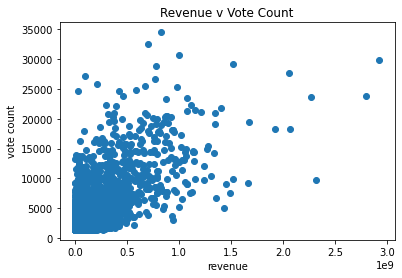

In [41]:
# Relationship between Revenue and Vote Count
plt.scatter(movie_tmdb_data['revenue'],movie_tmdb_data['vote_count'])
plt.title('Revenue v Vote Count')
plt.xlabel('revenue')
plt.ylabel('vote count')
plt.show()

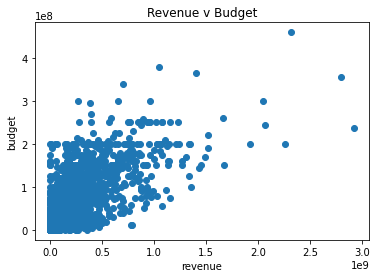

In [42]:
# Relationship between Revenue and Budget
plt.scatter(movie_tmdb_data['revenue'],movie_tmdb_data['budget'])
plt.title('Revenue v Budget')
plt.xlabel('revenue')
plt.ylabel('budget')
plt.show()

The two scatter plots above show the relationship between the revenue and the two best correlated features to revenue. Budget and Vote Count

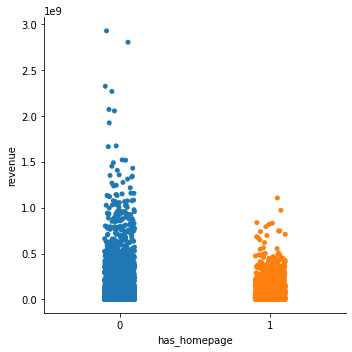

In [43]:
# Revenue and Home Page relationship
sns.catplot(data=movie_tmdb_data, x="has_homepage", y="revenue",hue="has_homepage")
plt.show()

Movies that have a homepage tend to produce more revenue based on above plot.

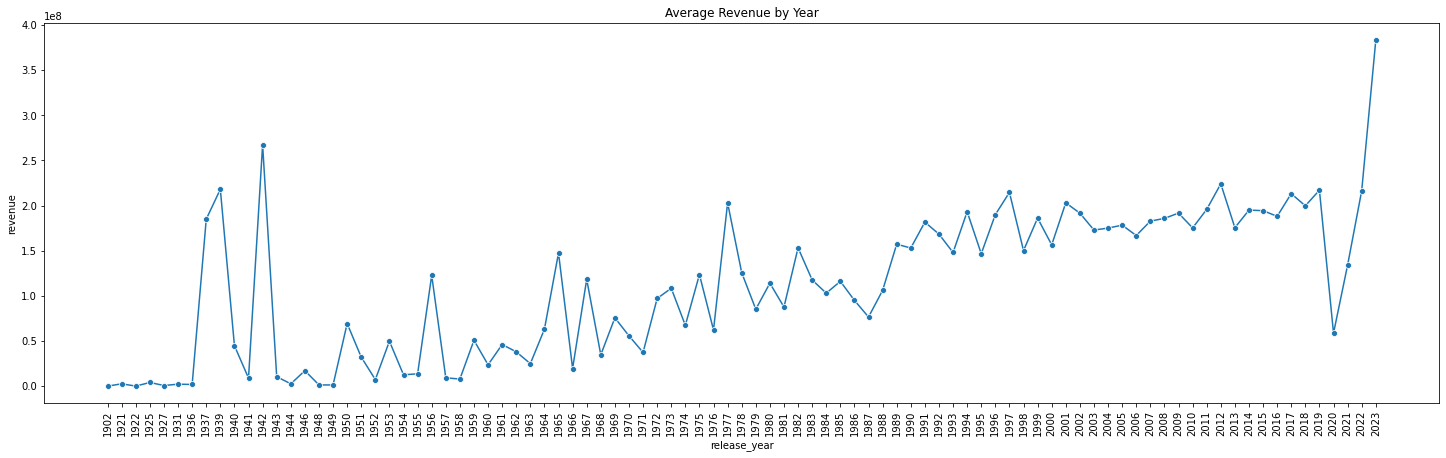

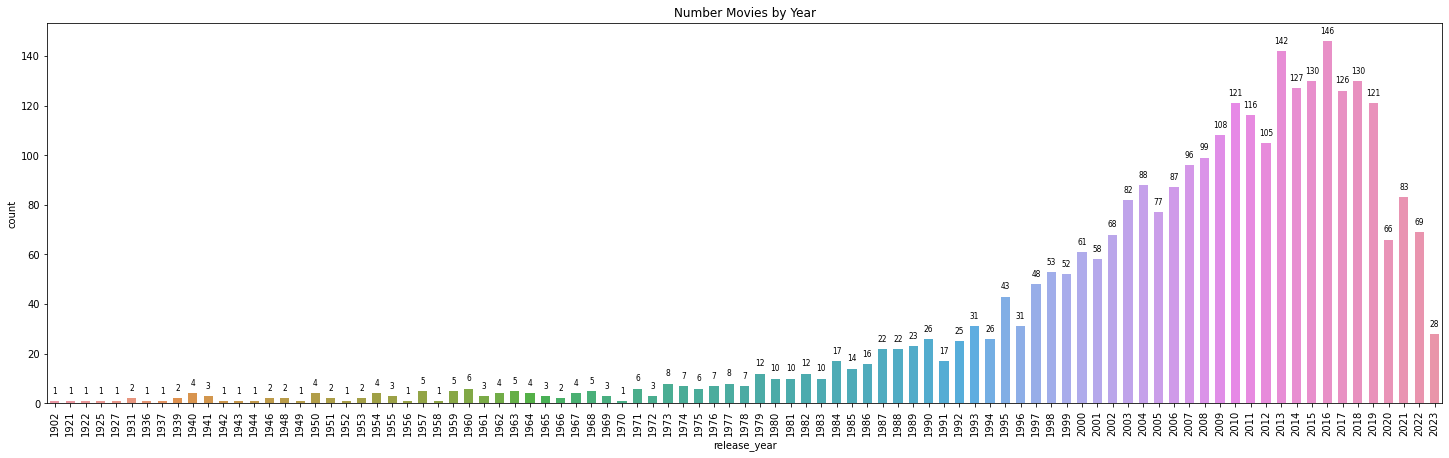

In [44]:
# Relationship of Revenue and Release Year
revenue_by_year_ave = movie_tmdb_data.groupby('release_year', as_index=False)['revenue'].mean()
revenue_by_year_ave['release_year'] = revenue_by_year_ave['release_year'].astype(str)
plt.figure(figsize=(25,7))
sns.lineplot(x="release_year",y="revenue",marker="o",data=revenue_by_year_ave).set(title='Average Revenue by Year')
plt.xticks(revenue_by_year_ave["release_year"],rotation=90)
plt.show()
plt.figure(figsize=(25,7))
year_counts = movie_tmdb_data['release_year'].value_counts().sort_index()
ax = sns.barplot(x=year_counts.index, y=year_counts.values, width=0.6)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Number Movies by Year')
plt.xlabel('release_year')
plt.ylabel('count')
plt.show()

Majority of movies are made during the 21st century and the revenue has slowly increased over the year on average.

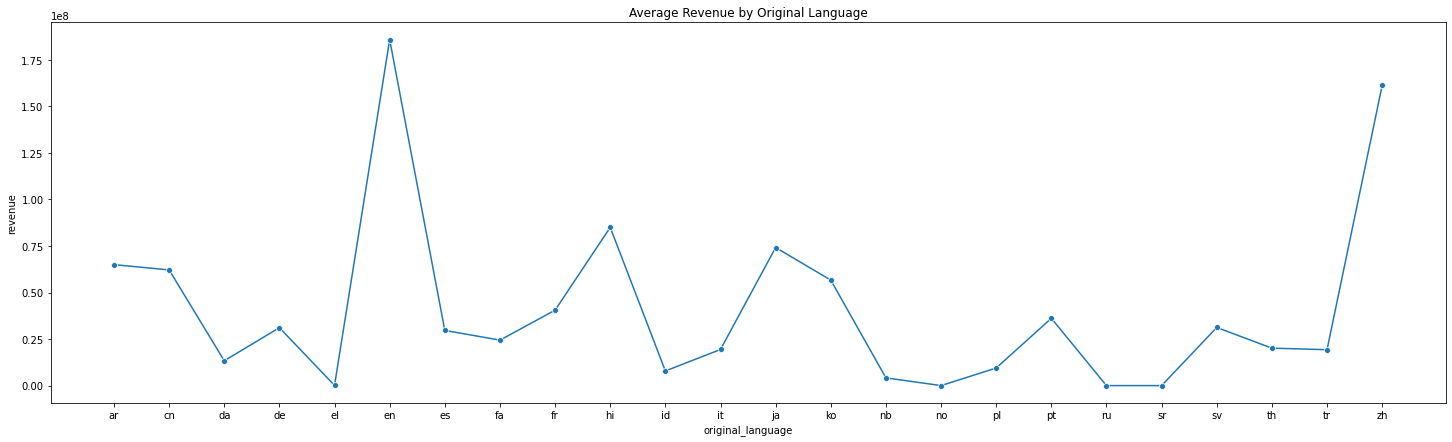

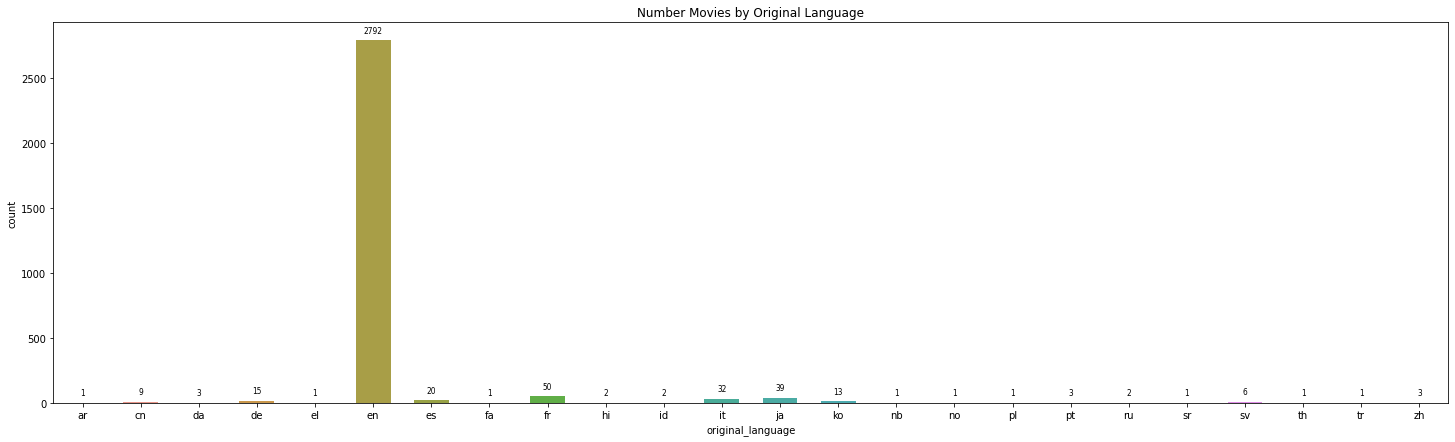

In [45]:
# Relationship of Revenue and Original Language
revenue_by_year_ave = movie_tmdb_data.groupby('original_language', as_index=False)['revenue'].mean()
plt.figure(figsize=(25,7))
sns.lineplot(x="original_language",y="revenue",marker="o",data=revenue_by_year_ave).set(title='Average Revenue by Original Language')
plt.show()
year_counts = movie_tmdb_data['original_language'].value_counts().sort_index()
plt.figure(figsize=(25,7))
ax = sns.barplot(x=year_counts.index, y=year_counts.values, width=0.6)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7.5)
plt.title('Number Movies by Original Language')
plt.xlabel('original_language')
plt.ylabel('count')
plt.show()

Nearly all movies are in English with extremely high revenue.

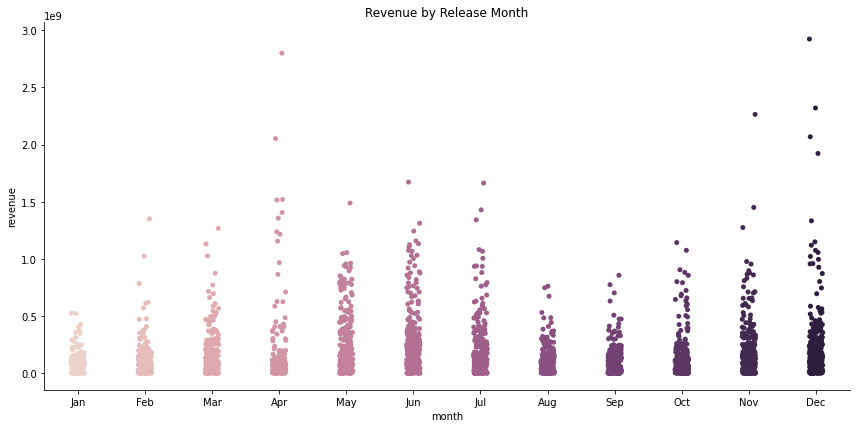

In [46]:
# Relationship of Revenue and Release Year
g = sns.catplot(data=movie_tmdb_data, x="release_month", y="revenue",hue="release_month", height=6, aspect=2)
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Revenue by Release Month')
plt.xlabel('month')
plt.ylabel('revenue')
plt.show()

Best movies revenue wise are released during the months of April, December, November, June, and July.

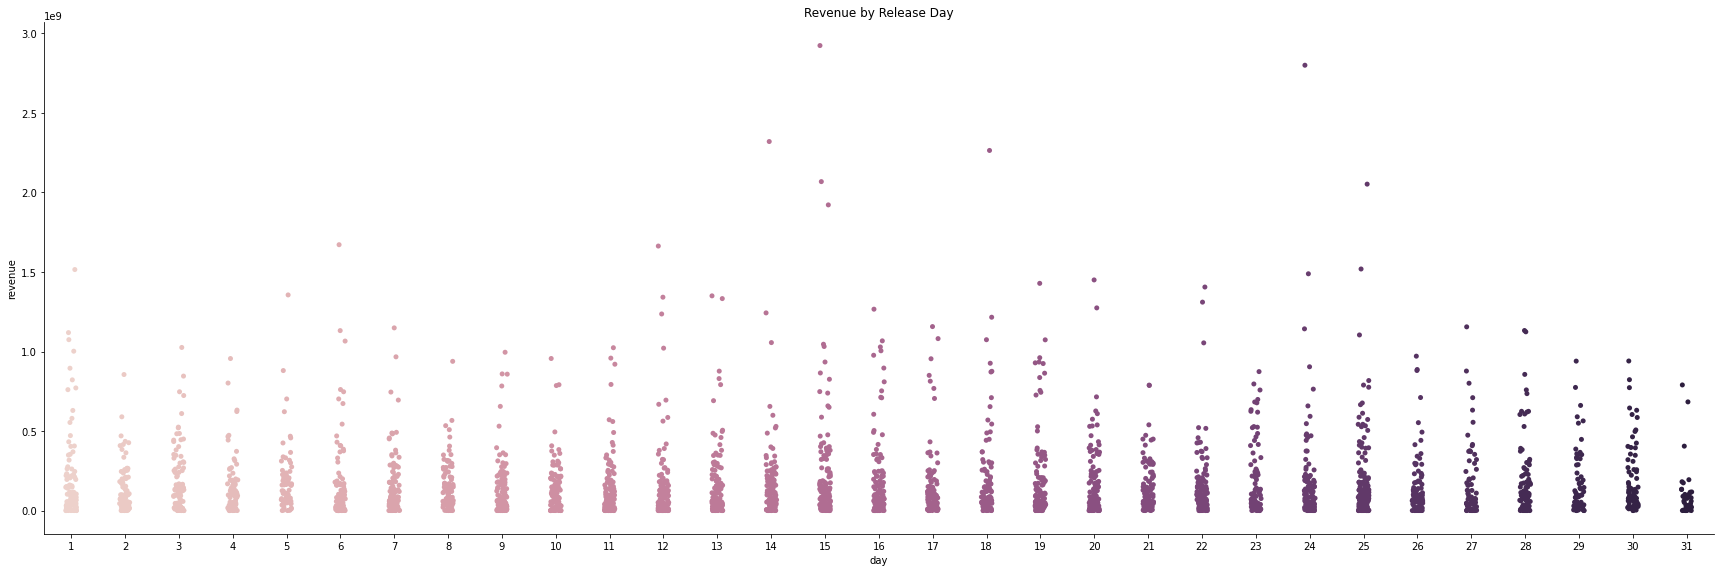

In [47]:
# Relationship of Revenue and Release Day
sns.catplot(data=movie_tmdb_data, x="release_day", y="revenue",hue="release_day", height=8, aspect=3)
plt.title('Revenue by Release Day')
plt.xlabel('day')
plt.ylabel('revenue')
plt.show()

In terms of release day, the 15th and the 24th of a month have the best revenue movies.

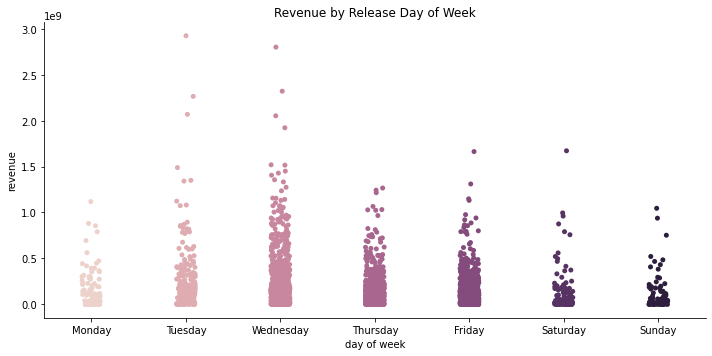

In [48]:
# Relationship of Revenue and Release Day of Week
g = sns.catplot(data=movie_tmdb_data, x="release_dayofweek", y="revenue",hue="release_dayofweek", height=5, aspect=2)
g.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Revenue by Release Day of Week')
plt.xlabel('day of week')
plt.ylabel('revenue')
plt.show()

The best revenue movies are generally released on a Tuesday or Wednesday.

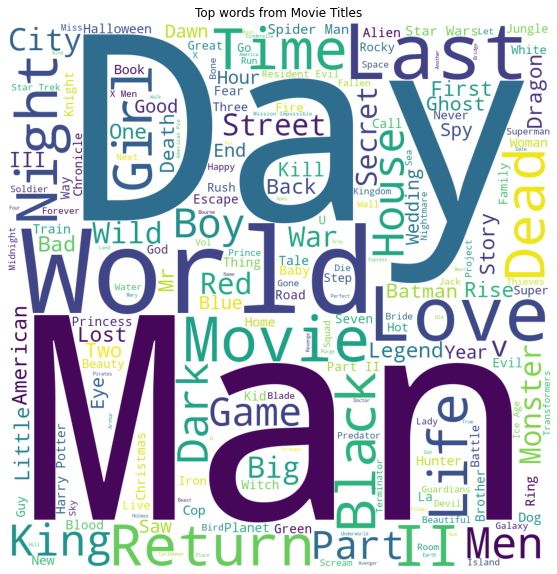

In [49]:
# Most used words in Movie Titles
plt.figure(figsize=(10,10))
titles = ' '.join(movie_tmdb_data['title'])
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1000, height=1000).generate(titles)
plt.imshow(wordcloud)
plt.title('Top words from Movie Titles')
plt.axis("off")
plt.show()

Most common words in movie titles are 'Man', 'Day', and 'World'

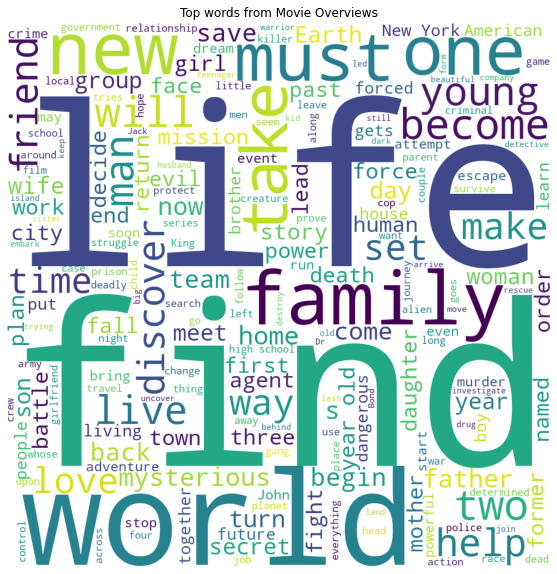

In [50]:
# Most used words in Movie Overviews
plt.figure(figsize=(10,10))
overviews = ' '.join(movie_tmdb_data['overview'].astype(str))
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1000, height=1000).generate(overviews)
plt.imshow(wordcloud)
plt.title('Top words from Movie Overviews')
plt.axis("off")
plt.show()

Most common words for movie overviews are 'find', 'life', and 'world'.

In [51]:
# Perform One-Hot Encoding for Movie Genres
mlb = MultiLabelBinarizer()
encoded_genres = pd.DataFrame(mlb.fit_transform(movie_tmdb_data['genres'].str.split(', ')), columns=mlb.classes_, index=movie_tmdb_data.index)
movie_tmdb_data = pd.concat([movie_tmdb_data, encoded_genres], axis=1)

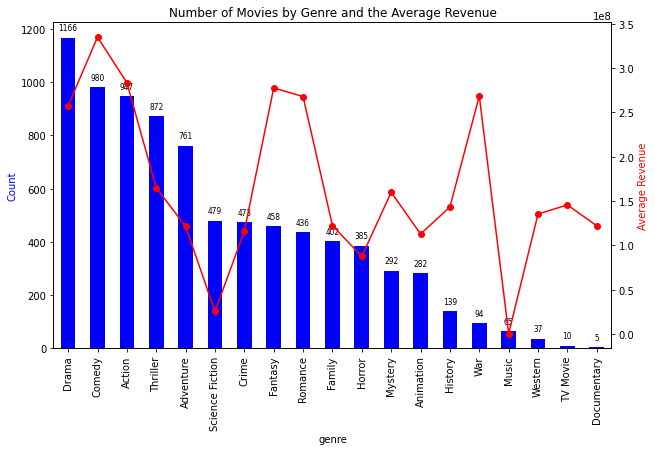

In [52]:
genre_counts = [len(movie_tmdb_data[movie_tmdb_data[i] == 1]) for i in movie_tmdb_data.loc[:, 'Action':].columns]
ave_revenue_genre = [movie_tmdb_data[movie_tmdb_data[i] == 1]['revenue'].mean() for i in movie_tmdb_data.loc[:, 'Action':].columns]
genre_counts_df = pd.DataFrame({'genre':movie_tmdb_data.loc[:, 'Action':].columns,'count':genre_counts}).sort_values(by='count',ascending=False)
fig, ax1 = plt.subplots(figsize=(10,6))
genre_counts_df.plot(kind='bar', x='genre', y='count', legend=False, ax=ax1, color='b')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7.5)
ax2 = ax1.twinx()
ax2.plot(genre_counts_df['genre'], ave_revenue_genre, color='r', marker='o', label='Average Popularity')
ax1.set_ylabel('Count', color='b')
ax2.set_ylabel('Average Revenue', color='r')
plt.title('Number of Movies by Genre and the Average Revenue')
plt.show()
## NOTE: Movies can have multiple genres

Drama, Comedy, Action, Thriller, and Adventure movies are the most common genres while Fantasy, Romance, War along with Drama, Comedy, and Action movies have higher averages in revenue.

### Model Training

Now its time to train some machine learning models. It will help make movie revenue predictions.

We'll look into three different machine learning algorithms:

1. Linear Regression
2. Random Forest
3. Extreme Gradient Boosting

In [53]:
X = movie_tmdb_data.drop(['revenue','release_day','id','title','status','release_date','backdrop_path','homepage','imdb_id',
                          'original_language','original_title','overview','poster_path','tagline','genres','production_companies',
                          'production_countries','spoken_languages'], axis=1)
y = movie_tmdb_data['revenue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

R-Squared is: 0.7349529440813344


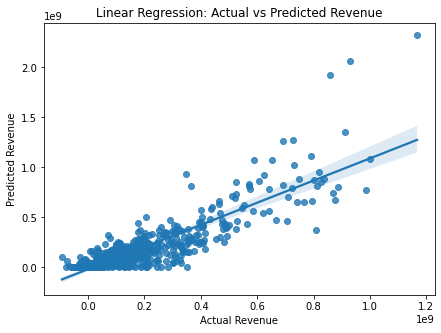

In [55]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_hat = lin_model.predict(X_test)
print("R-Squared is:", r2_score(y_test, y_hat))
plt.figure(figsize=(7,5))
sns.regplot(x="predicted", y="actual", data = pd.DataFrame({'actual':y_test,'predicted':y_hat}))
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Linear Regression: Actual vs Predicted Revenue')
plt.show()

R-Squared is: 0.7652609095061407


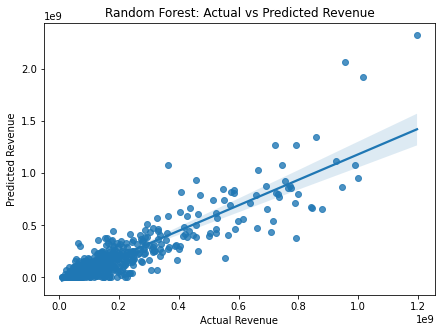

In [56]:
RF_model = RandomForestRegressor(n_estimators=100,max_depth=15,min_samples_split=2,min_samples_leaf=2,max_features='sqrt',random_state=42)
RF_model.fit(X_train, y_train)
y_hat = RF_model.predict(X_test)
print("R-Squared is:", r2_score(y_test, y_hat))
plt.figure(figsize=(7,5))
sns.regplot(x="predicted", y="actual", data = pd.DataFrame({'actual':y_test,'predicted':y_hat}))
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Random Forest: Actual vs Predicted Revenue')
plt.show()

R-Squared is: 0.8155087898354203


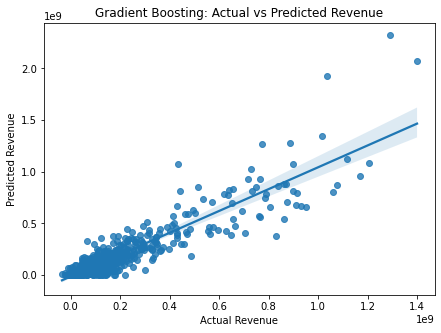

In [57]:
XGBmodel = XGBRegressor(colsample_bytree=0.8,learning_rate=0.1,max_depth=5,min_child_weight= 2,n_estimators=100,subsample=0.9)
XGBmodel.fit(X_train, y_train)
y_hat = XGBmodel.predict(X_test)
print("R-Squared is:", r2_score(y_test, y_hat))
plt.figure(figsize=(7,5))
sns.regplot(x="predicted",y="actual",data = pd.DataFrame({'actual':y_test,'predicted':y_hat}))
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Gradient Boosting: Actual vs Predicted Revenue')
plt.show()

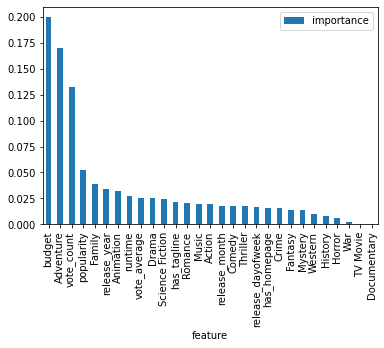

In [58]:
feature_importances = pd.DataFrame({'feature':X.columns,'importance':XGBmodel.feature_importances_}).sort_values('importance',ascending=False).set_index('feature')
feature_importances.plot.bar()
plt.show()

Out of the three models, the Extreme Gradient Boosting model performed the best with 0.816 R-Squared value.

From this model, we see that the most important features are 'budget', 'Adventure' and 'vote_count'.